In [1]:
import numpy as np
import keras 
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils.vis_utils import plot_model
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from pathlib import Path
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import plot_confusion_matrix,ConfusionMatrixDisplay
from sklearn.utils import shuffle
from sklearn.metrics import f1_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,OneHotEncoder 
from sklearn import metrics
from sklearn.svm import SVC
from skimage.io import imread
import seaborn as sn
print("Files imported successfully")
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30*30 + 1)
import seaborn as sns
import cv2
import tensorflow as tf
from tqdm import tqdm
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
import glob
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk(r'.\AMLS-2021_dataset\dataset\smoothen_image'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Files imported successfully
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0000.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0001.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0002.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0003.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0004.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0005.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0006.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0007.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0008.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0009.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0010.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0011.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0012.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0013.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0014.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0015.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\I

.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1461.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1462.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1463.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1464.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1465.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1466.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1467.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1468.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1469.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1470.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1471.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1472.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1473.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1474.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1475.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1476.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1477.jpg
.\AMLS-2021_da

.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2981.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2982.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2983.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2984.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2985.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2986.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2987.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2988.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2989.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2990.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2991.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2992.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2993.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2994.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2995.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2996.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_2997.jpg
.\AMLS-2021_da

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

# Import Image

In [3]:
image_size = 128
def importjpg(jpgfile,X):
    #img = cv2.imread(jpgfile,0)
    img = cv2.imread(jpgfile,0)
    img = cv2.resize(img,(image_size, image_size))
    img = np. array(img)
    img = img 
    #img = img.flatten()
    X.append(img)


    
# X dataset
X = []
for jpgfile in glob.glob(r"./AMLS-2021_dataset/dataset/smoothen_image/*.jpg"):
    importjpg(jpgfile,X)
data = np. array(X)
print(data.shape)

data = data[..., np.newaxis]

print(data.shape)

(3000, 128, 128)
(3000, 128, 128, 1)


# Import csv

In [4]:
data_csv = pd.read_csv (r'./AMLS-2021_dataset/dataset/label.csv')
print (data_csv)

Y_binary = pd.DataFrame(data_csv, columns= ['tumor_or_not'])
Y_binary = np.array(Y_binary)
Y_binary = Y_binary.flatten()
print(Y_binary.shape)


#one hot encoder
result = []
for i in Y_binary:
    if i == 0:
        result.append(encoder.transform([[0]]).toarray())
    else:
        result.append(encoder.transform([[1]]).toarray())

result = np. array(result)   
result = result[:,0,:]
print(result.shape)



           file_name       label  tumor_or_not  Tumor_type
0     IMAGE_0000.jpg  meningioma             1           1
1     IMAGE_0001.jpg          no             0           0
2     IMAGE_0002.jpg  meningioma             1           1
3     IMAGE_0003.jpg      glioma             1           2
4     IMAGE_0004.jpg  meningioma             1           1
...              ...         ...           ...         ...
2995  IMAGE_2995.jpg          no             0           0
2996  IMAGE_2996.jpg  meningioma             1           1
2997  IMAGE_2997.jpg      glioma             1           2
2998  IMAGE_2998.jpg      glioma             1           2
2999  IMAGE_2999.jpg   pituitary             1           3

[3000 rows x 4 columns]
(3000,)
(3000, 2)


In [5]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=101)

In [6]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 1), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1

In [7]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
60/60 [==============================] - 56s 926ms/step - loss: 8.0739 - accuracy: 0.8258 - val_loss: 1.4402 - val_accuracy: 0.7583
Epoch 2/30
60/60 [==============================] - 55s 921ms/step - loss: 0.9554 - accuracy: 0.9179 - val_loss: 1.2369 - val_accuracy: 0.6917
Epoch 3/30
60/60 [==============================] - 55s 912ms/step - loss: 0.3582 - accuracy: 0.9396 - val_loss: 0.3623 - val_accuracy: 0.9050
Epoch 4/30
60/60 [==============================] - 56s 928ms/step - loss: 0.1688 - accuracy: 0.9575 - val_loss: 0.2548 - val_accuracy: 0.9183
Epoch 5/30
60/60 [==============================] - 55s 921ms/step - loss: 0.0900 - accuracy: 0.9688 - val_loss: 0.2905 - val_accuracy: 0.9283
Epoch 6/30
60/60 [==============================] - 56s 926ms/step - loss: 0.0711 - accuracy: 0.9725 - val_loss: 0.2791 - val_accuracy: 0.9267
Epoch 7/30
60/60 [==============================] - 55s 913ms/step - loss: 0.0607 - accuracy: 0.9783 - val_loss: 0.2784 - val_accuracy: 0.9367

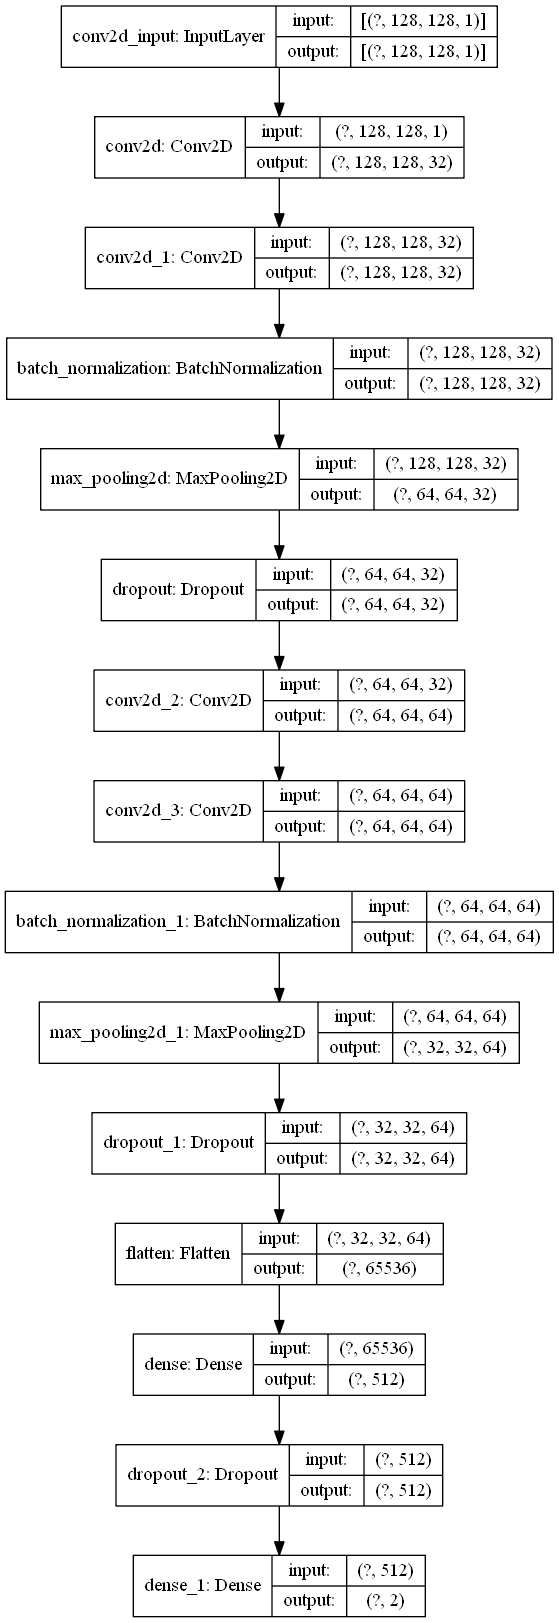

In [8]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

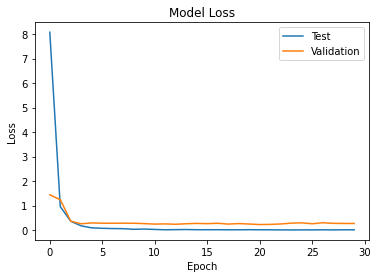

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.rcParams["figure.figsize"] = (5,5)
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

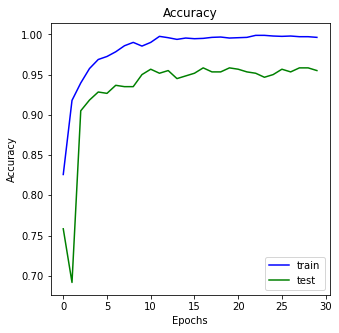

In [10]:
plt.plot(history.history["accuracy"],c = "blue")
plt.plot(history.history["val_accuracy"],c = "green")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.rcParams["figure.figsize"] = (5,5)
plt.legend(["train", "test"])

# Test accuracy

In [11]:
y_predict = model.predict(x_test)

y_predict_code = np.argmax(y_predict, axis=1)
  

In [12]:
y_test_code = encoder.inverse_transform(y_test)
#y_predict_code = encoder.inverse_transform(y_predict_code)
print(accuracy_score(y_test_code,y_predict_code))

0.955


              precision    recall  f1-score   support

           0       0.85      0.84      0.84        86
           1       0.97      0.97      0.97       514

    accuracy                           0.95       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.95      0.95      0.95       600



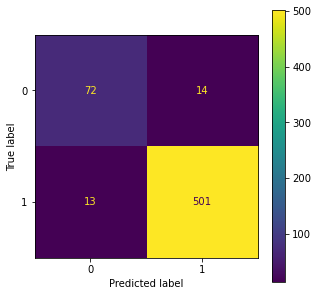

In [13]:
classification_metrics = metrics.classification_report(y_test_code,y_predict_code)
print(classification_metrics)
confusion_matrix_test = confusion_matrix(y_test_code,y_predict_code)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test,display_labels=['0','1'])
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()



# Test accuracy using trial dataset

In [14]:
# X dataset
X_trail = []
for jpgfile in glob.glob(r".\AMLS-2021_test\test\image\*.jpg"):
    importjpg(jpgfile,X_trail)
X_trail = np. array(X_trail)

data_trail = np. array(X_trail)
print(data_trail.shape)

data_trail = data_trail[..., np.newaxis]

print(data_trail.shape)


(200, 128, 128)
(200, 128, 128, 1)


In [15]:
data_csv_trail = pd.read_csv (r'.\AMLS-2021_test\test\label.csv')
#print (data_csv_trail)
Y_binary_trail = pd.DataFrame(data_csv_trail, columns= ['tumor_or_not'])
Y_binary_trail = np.array(Y_binary_trail)
Y_binary_trail = Y_binary_trail.flatten()
print(Y_binary_trail.shape)
#one hot encoder
result_trail = []
for i in Y_binary_trail:
    if i == 0:
        result_trail.append(encoder.transform([[0]]).toarray())
    else:
        result_trail.append(encoder.transform([[1]]).toarray())

result_trail = np.array(result_trail)   
result_trail = result_trail[:,0,:]
print(result_trail.shape)



(200,)
(200, 2)


In [16]:
y_predict_trail = model.predict(data_trail)

y_predict_trail_code=[]
for predict in y_predict_trail:
    if predict[0]>predict[1]:
        y_predict_trail_code.append([1,0])
    else:
        y_predict_trail_code.append([0,1])
y_predict_trail_code = np.array(y_predict_trail_code)  
print(y_predict_trail_code.shape)

(200, 2)


In [17]:
y_trail_code = encoder.inverse_transform(result_trail)
y_predict_trail_code = encoder.inverse_transform(y_predict_trail_code)
print(accuracy_score(y_trail_code,y_predict_trail_code))


0.935


# Multi Classification

In [18]:
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]]) 

# 0 - Tumor
# 1 - meningioma_tumor
# 2 - glioma_tumor
# 3 - pituitary_tumor

OneHotEncoder()

In [19]:
image_size = 128
def importjpg(jpgfile,X):
    #img = cv2.imread(jpgfile,0)
    img = cv2.imread(jpgfile,0)
    img = cv2.resize(img,(image_size, image_size))
    img = np. array(img)
    img = img 
    #img = img.flatten()
    X.append(img)


    
# X dataset
X = []
for jpgfile in glob.glob(r"./AMLS-2021_dataset/dataset/smoothen_image/*.jpg"):
    importjpg(jpgfile,X)
data = np. array(X)
print(data.shape)

data = data[..., np.newaxis]

print(data.shape)

(3000, 128, 128)
(3000, 128, 128, 1)


In [20]:
data_csv = pd.read_csv (r'./AMLS-2021_dataset/dataset/label.csv')
print (data_csv)

Y_multi = pd.DataFrame(data_csv, columns= ['label'])
Y_multi = np.array(Y_multi)
Y_multi = Y_multi.flatten()
print(Y_multi.shape)


#one hot encoder
result = []
for i in Y_multi:
    if i == 'no':
        result.append(encoder.transform([[0]]).toarray())
    elif i == 'meningioma':
        result.append(encoder.transform([[1]]).toarray())
    elif i == 'glioma':
        result.append(encoder.transform([[2]]).toarray())
    elif i == 'pituitary':
        result.append(encoder.transform([[3]]).toarray())
result = np. array(result)   
result = result[:,0,:]
print(result.shape)


           file_name       label  tumor_or_not  Tumor_type
0     IMAGE_0000.jpg  meningioma             1           1
1     IMAGE_0001.jpg          no             0           0
2     IMAGE_0002.jpg  meningioma             1           1
3     IMAGE_0003.jpg      glioma             1           2
4     IMAGE_0004.jpg  meningioma             1           1
...              ...         ...           ...         ...
2995  IMAGE_2995.jpg          no             0           0
2996  IMAGE_2996.jpg  meningioma             1           1
2997  IMAGE_2997.jpg      glioma             1           2
2998  IMAGE_2998.jpg      glioma             1           2
2999  IMAGE_2999.jpg   pituitary             1           3

[3000 rows x 4 columns]
(3000,)
(3000, 4)


In [21]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=101)

In [22]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 1), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)       

In [23]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
60/60 [==============================] - 56s 939ms/step - loss: 10.9242 - accuracy: 0.5763 - val_loss: 5.2297 - val_accuracy: 0.2117
Epoch 2/30
60/60 [==============================] - 54s 901ms/step - loss: 1.2672 - accuracy: 0.7367 - val_loss: 1.1323 - val_accuracy: 0.6583
Epoch 3/30
60/60 [==============================] - 56s 933ms/step - loss: 0.7732 - accuracy: 0.7858 - val_loss: 0.8337 - val_accuracy: 0.7783
Epoch 4/30
60/60 [==============================] - 53s 882ms/step - loss: 0.4803 - accuracy: 0.8254 - val_loss: 0.8317 - val_accuracy: 0.7967
Epoch 5/30
60/60 [==============================] - 57s 947ms/step - loss: 0.4036 - accuracy: 0.8558 - val_loss: 0.8577 - val_accuracy: 0.8050
Epoch 6/30
60/60 [==============================] - 58s 965ms/step - loss: 0.3847 - accuracy: 0.8587 - val_loss: 0.8225 - val_accuracy: 0.8117
Epoch 7/30
60/60 [==============================] - 58s 963ms/step - loss: 0.2850 - accuracy: 0.9013 - val_loss: 0.9217 - val_accuracy: 0.800

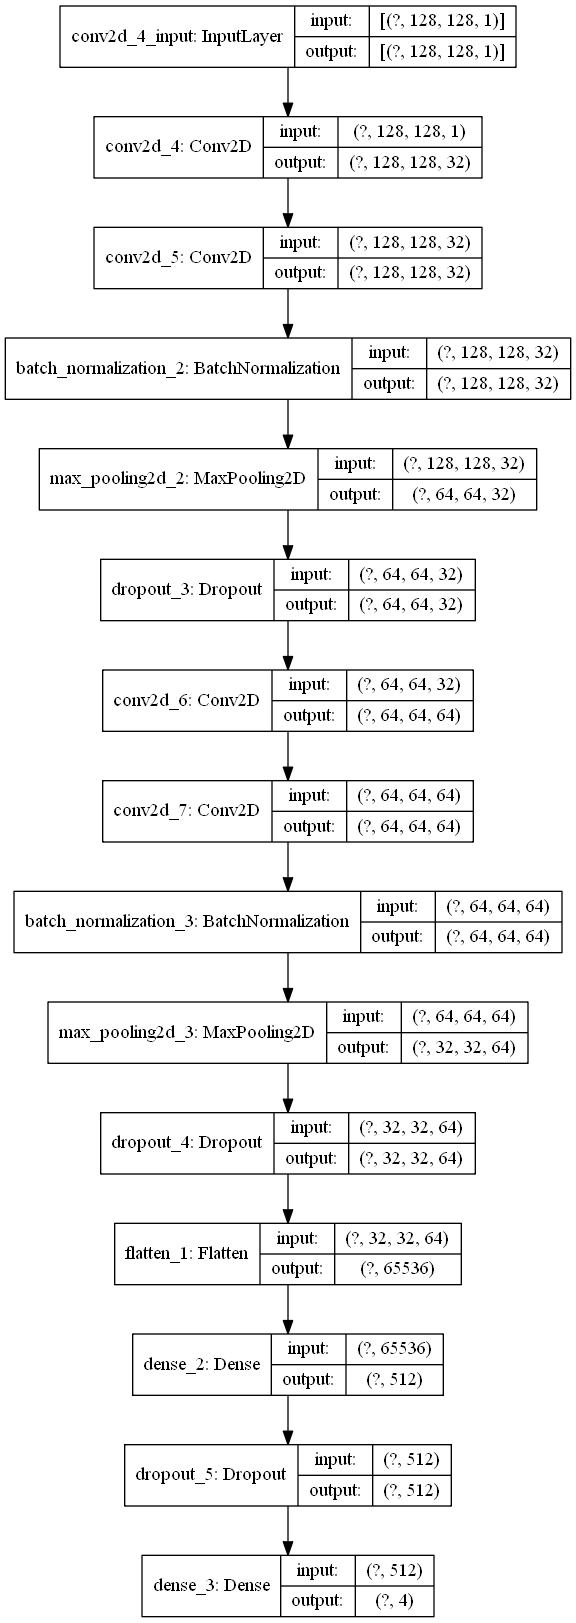

In [24]:
plot_model(model, to_file='model_plot_multi.png', show_shapes=True, show_layer_names=True)

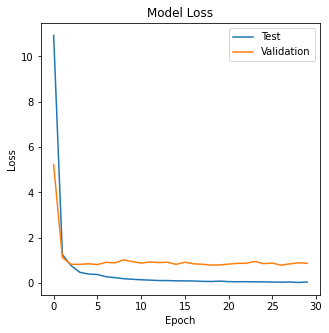

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.rcParams["figure.figsize"] = (5,5)
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

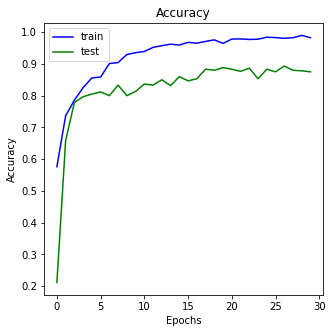

In [26]:
plt.plot(history.history["accuracy"],c = "blue")
plt.plot(history.history["val_accuracy"],c = "green")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.rcParams["figure.figsize"] = (5,5)
plt.legend(["train", "test"])

# Test Accuracy

In [27]:
y_predict = model.predict(x_test)
print(y_predict.shape)
y_predict_code = np.argmax(y_predict, axis=1)
print(y_predict_code.shape)

(600, 4)
(600,)


In [28]:
y_test_code = encoder.inverse_transform(y_test)
#y_predict_code = encoder.inverse_transform(y_predict_code)
print(accuracy_score(y_test_code,y_predict_code))

0.875


              precision    recall  f1-score   support

           0       0.81      0.90      0.85        86
           1       0.92      0.74      0.82       185
           2       0.80      0.92      0.86       161
           3       0.95      0.98      0.96       168

    accuracy                           0.88       600
   macro avg       0.87      0.88      0.87       600
weighted avg       0.88      0.88      0.87       600



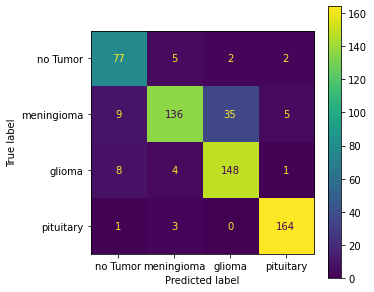

In [29]:
classification_metrics = metrics.classification_report(y_test_code,y_predict_code)
print(classification_metrics)
confusion_matrix_test = confusion_matrix(y_test_code,y_predict_code)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test,display_labels=['no Tumor','meningioma','glioma','pituitary'])
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()


# Using test dataset from AMLS-2021_test

In [30]:
# X dataset
X_trail = []
for jpgfile in glob.glob(r".\AMLS-2021_test\test\image\*.jpg"):
    importjpg(jpgfile,X_trail)
X_trail = np. array(X_trail)

data_trail = np. array(X_trail)
print(data_trail.shape)

data_trail = data_trail[..., np.newaxis]

print(data_trail.shape)


(200, 128, 128)
(200, 128, 128, 1)


In [31]:
data_csv_trail = pd.read_csv (r'.\AMLS-2021_test\test\label.csv')
#print (data_csv_trail)
Y_multi_trail = pd.DataFrame(data_csv_trail, columns= ['label'])
Y_multi_trail = np.array(Y_multi_trail)
Y_multi_trail = Y_multi_trail.flatten()
print(Y_multi_trail.shape)
#one hot encoder
result_trail = []
for i in Y_multi_trail:
    if i == 'no':
        result_trail.append(encoder.transform([[0]]).toarray())
    elif i == 'meningioma':
        result_trail.append(encoder.transform([[1]]).toarray())
    elif i == 'glioma':
        result_trail.append(encoder.transform([[2]]).toarray())
    elif i == 'pituitary':
        result_trail.append(encoder.transform([[3]]).toarray())

result_trail = np.array(result_trail)   
result_trail = result_trail[:,0,:]
print(result_trail.shape)


(200,)
(200, 4)


In [32]:
y_predict_trail = model.predict(data_trail)

print(y_predict_trail.shape)
y_predict_code_trail = np.argmax(y_predict_trail, axis=1)
print(y_predict_code_trail)


(200, 4)
[3 1 2 3 2 3 3 3 3 0 1 0 3 1 2 3 3 1 1 0 3 1 1 2 2 3 0 1 0 0 0 0 1 1 1 0 2
 3 1 3 0 0 0 3 1 3 3 1 1 0 0 3 2 2 3 3 2 2 3 2 2 1 3 2 2 0 3 3 3 1 2 3 1 0
 3 2 1 1 3 2 0 2 3 1 0 3 2 3 2 2 3 2 2 3 1 2 2 0 3 3 0 1 0 0 3 0 1 0 0 3 2
 3 1 1 0 2 2 1 2 0 3 1 3 3 1 3 2 3 3 3 2 3 3 3 1 1 3 0 0 2 3 3 2 2 0 1 1 2
 1 1 3 0 0 0 0 2 1 1 0 2 2 1 3 3 2 2 2 2 1 2 1 2 1 3 2 1 2 3 1 2 3 3 2 0 1
 3 1 1 1 1 1 2 2 1 0 3 0 2 0 2]


In [33]:
y_trail_code = encoder.inverse_transform(result_trail)
y_trail_code = y_trail_code[:,0]
print(y_trail_code)

[1 1 2 3 2 3 3 3 3 2 0 0 3 1 2 3 3 1 1 1 3 1 1 1 2 3 0 1 0 0 0 2 1 1 1 2 2
 3 1 3 0 0 0 3 1 3 3 1 1 0 0 3 2 2 3 1 2 1 3 2 1 1 1 2 2 0 3 3 3 1 2 3 1 2
 3 2 0 1 3 2 0 2 3 1 0 3 2 3 1 1 3 2 1 3 1 2 2 0 3 3 0 0 0 0 3 0 1 0 1 3 2
 3 1 1 0 2 1 1 1 0 1 1 3 1 1 3 1 3 3 3 2 3 3 3 1 1 2 0 0 2 3 3 2 0 0 1 1 1
 1 1 1 0 2 0 0 2 1 1 0 2 2 1 3 3 2 1 2 2 1 2 1 2 1 3 2 1 2 3 1 2 3 3 2 0 1
 3 1 1 1 1 1 1 0 1 0 3 0 1 0 2]


In [34]:
#y_predict_trail_code = encoder.inverse_transform(y_predict_trail_code)
print(accuracy_score(y_trail_code,y_predict_code_trail))

0.84


              precision    recall  f1-score   support

           0       0.82      0.86      0.84        37
           1       0.94      0.69      0.80        68
           2       0.71      0.86      0.78        43
           3       0.88      1.00      0.94        52

    accuracy                           0.84       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.85      0.84      0.84       200



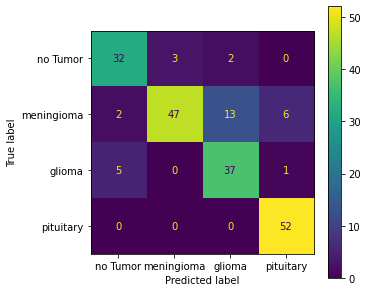

In [35]:
classification_metrics = metrics.classification_report(y_trail_code,y_predict_code_trail)
print(classification_metrics)
confusion_matrix_test = confusion_matrix(y_trail_code,y_predict_code_trail)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test,display_labels=['no Tumor','meningioma','glioma','pituitary'])
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()
